In [18]:
from comet_ml import start
from matplotlib import pyplot as plt
# 
# experiment = start(
#     api_key="",
#     project_name="prueba",
#     workspace="emiliodelgadouy"
# )

In [19]:
from data.PatchSequence import PatchSequence
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from data.Dataset import Dataset

In [21]:
dataset = Dataset(lateralize=False, reduced=True, n=32)
dataset.head()

,laterality,view,breast_birads,finding_birads,split,xmin,ymin,xmax,ymax,path,findings
0,R,CC,4,4,training,485.695624,985.773942,609.595900,1078.419728,data/images_original/48575a27b7c992427041a82fa...,1
1,R,MLO,4,4,training,532.399692,743.812744,639.422675,812.095390,data/images_original/48575a27b7c992427041a82fa...,1
2,R,CC,3,3,training,368.152714,499.060222,816.519337,1287.129503,data/images_original/75e8e48933289d70b407379a5...,1
3,R,MLO,3,3,training,162.492921,726.730749,729.029452,1105.680056,data/images_original/75e8e48933289d70b407379a5...,1
4,R,CC,4,4,training,403.582493,1078.254802,580.267104,1203.183844,data/images_original/c3487424fee1bdd4515b72dc3...,1


In [22]:
dataset.iloc[0]

laterality                                                        R
view                                                             CC
breast_birads                                                     4
finding_birads                                                    4
split                                                      training
xmin                                                     485.695624
ymin                                                     985.773942
xmax                                                       609.5959
ymax                                                    1078.419728
path              data/images_original/48575a27b7c992427041a82fa...
findings                                                          1
Name: 0, dtype: object

In [23]:
# dataset.head().render(render_sample_patch=True)

In [24]:
ds_training = dataset[dataset["split"] == "training"]
ds_test = dataset[dataset["split"] == "test"]

In [25]:
# dataset.stats()

In [26]:
# ds_training.stats()

In [27]:
# ds_test.stats()

In [28]:
dataset.preload_cache()
# # ——————————————#
# # Asume que ya inicializaste tu experiment:
# # experiment = Experiment(api_key="…", project_name="…", workspace="…")
# # ——————————————#
# 
# from tensorflow.keras.regularizers import l1_l2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import (
#     GlobalAveragePooling2D,
#     Dense,
#     BatchNormalization,
#     Dropout
# )
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

# from tensorflow.keras.metrics import AUC
# 
# # 1. Hiperparámetros
hparams = {
    'IMG_SIZE': (299, 299),
    'BATCH_SIZE': 32,
    'EPOCHS': 10,
    'l1_reg': 1e-4,
    'l2_reg': 1e-4,
    'dropout_rate': 0.4,
    'learning_rate': 1e-4,
    'BACKBONE': 'InceptionV3'
}
# experiment.log_parameters(hparams)
# 
# # 2. Generadores
# train_generator = PatchSequence(
#     ds_training,
#     batch_size=hparams['BATCH_SIZE'],
#     patch_size=hparams['IMG_SIZE'],
#     shuffle=True,
#     preprocess_fn=preprocess_input
# )
# val_generator = PatchSequence(
#     ds_test,
#     batch_size=hparams['BATCH_SIZE'],
#     patch_size=hparams['IMG_SIZE'],
#     shuffle=False,
#     preprocess_fn=preprocess_input
# )
# 
# # 3. Construcción del modelo
# base = InceptionV3(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(*hparams['IMG_SIZE'], 3)
# )
# for layer in base.layers:
#     layer.trainable = False
# 
# x = base.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(
#     512,
#     activation='relu',
#     kernel_regularizer=l1_l2(hparams['l1_reg'], hparams['l2_reg'])
# )(x)
# x = BatchNormalization()(x)
# x = Dropout(hparams['dropout_rate'])(x)
# output = Dense(1, activation='sigmoid')(x)
# 
# model = Model(inputs=base.input, outputs=output)
# 
# # 4. Compilación con AUC ROC
# model.compile(
#     optimizer=Adam(learning_rate=hparams['learning_rate']),
#     loss='binary_crossentropy',
#     metrics=[
#         'accuracy',
#         AUC(name='auc_roc', curve='ROC')
#     ]
# )
# 
# # 5. Entrenamiento con callback de Comet
# keras_callback = Experiment.get_callback('keras')
# model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=hparams['EPOCHS'],
#     steps_per_epoch=len(train_generator),
#     validation_steps=len(val_generator),
#     callbacks=[keras_callback]
# )


Preloading cache: 100%|██████████| 30/30 [00:00<00:00, 62.26it/s]


In [29]:
generator = PatchSequence(
    dataset,
    batch_size=hparams['BATCH_SIZE'],
    patch_size=hparams['IMG_SIZE'],
    shuffle=True,
    preprocess_fn=None
)
# for x_batch, y_batch in train_generator:
#     # x_batch: tensor de imágenes, y_batch: etiquetas
#     print(x_batch.shape, y_batch.shape)
#     # aquí p.ej. inspeccionas, guardas, o pasas por model.train_on_batch()

In [30]:
# train_generator.

In [31]:
# generator.__len__()

In [32]:
x0, y0 = generator[0]


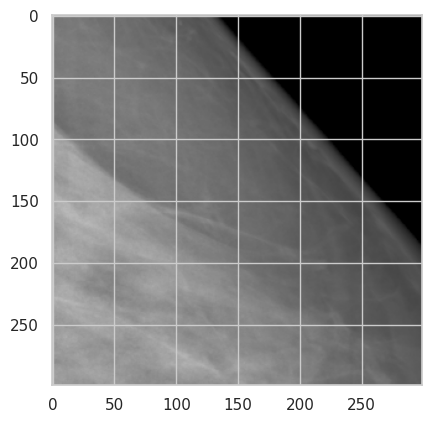

In [43]:
plt.imshow(x0[0].astype("int"))

In [33]:
# for x_batch, y_batch in generator:
#     # x_batch: tensor de imágenes, y_batch: etiquetas
#     print(x_batch.shape, y_batch.shape)
#     # aquí p.ej. inspeccionas, guardas, o pasas por model.train_on_batch()